<a href="https://colab.research.google.com/github/yongminkim0501/FinancialData/blob/main/KIS_Develop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install python-kis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 3.8 MB/s eta 0:00:00


In [3]:
cd /content/drive/MyDrive/kis_programming

/content/drive/MyDrive/kis_programming


In [5]:
from pykis import PyKis, KisAuth, KisBalance,KisQuote
class private_kis:
  def __init__(self):
    self.token = None
    self.kis = None

  def connect_token(self, token_path):
    self.kis = PyKis(token_path, keep_token = True)
    self.kis = PyKis(KisAuth.load(token_path), keep_token = True)
    token_kis = self.kis
    return token_kis # 연결된 객체를 반환함

class private_account:
  def __init__(self, kis):
    self.account = None
    self.Kis = kis

  def connect_account(self):
    self.account = self.Kis.account()
    balance: KisBalance = self.account.balance()
    return balance

class KIS_stock:
  def __init__ (self, kis):
    self.stock = None
    self.kis = kis # connect_token 에서 반환된 연결된 token임

  def connect_stock(self, name):
    self.stock = self.kis.stock(name) # name 에 해당하는 주식과 객체를 연결함.

  def search_stock(self):
    quote: KisQuote = self.stock.quote() # name으로 저장된 주식을 반환함
    quote: KisQuote = self.stock.quote(extended = True)
    return quote

In [7]:
p_kis = private_kis()
p_stock = p_kis.connect_token('secret.json') #json 파일로 저장된 secret key를 통해 api 연결

In [48]:
sp100_tickers = [
    "AAPL","MSFT", "AMZN", "TSLA", "NVDA", "META", "JNJ", "GOOGL","V",
    "XOM", "PG", "CVX", "PFE", "KO", "INTC", "WMT", "MCD", "PEP", "HD", "ABBV",
    "VZ",]
    # "ABT", "CRM", "DIS", "NKE", "MRK", "BMY", "TXN", "LMT", "ORCL", "AMGN",
    # "CVS", "HON", "UNH", "GE", "MMM", "GS", "CAT", "MDT", "NKE", "HD", "PFE",
    # "BLK", "MS", "CL", "RTX", "JCI", "GM", "BA", "LLY", "NEE", "D", "TMUS",
    # "AXP", "PM", "COP", "LUMN", "SPGI", "IBM",
    # "SCHW", "MCD", "HSY", "BIIB",
    # "AMD", "TMUS", "BMY", "LLY", "CI", "MS", "HPE", "MAR", "DAL", "AIG",
    # "UPS", "SYY", "CI", "SLB", "CTSH", "CTVA", "MOS", "ILMN", "EXC", "DIS",
    # "ANTM", "BLK", "KR", "LLY", "REGN", "LUMN", "QCOM", "GD", "AZN", "WFC",
    # "C", "LMT", "CB", "ANTM", "AMT", "WM"
# kis_stock = KIS_stock(p_stock)
# kis_stock.connect_stock('NVDA') # 연결된 api를 통해서 stock 객체 생성, 예시로 nvidia
# q = kis_stock.search_stock() # 아까 생성된 객체를 검색함, 해당 정보를 반환,
# print(q.indicator.per)

# not_bad = []
json = []

for name in sp100_tickers:
  kis_stock = KIS_stock(p_stock)
  kis_stock.connect_stock(name)
  stock_data = kis_stock.search_stock()
  dic_data = {
    "CODE":name,
    "NAME":stock_data.name,
    "PER":float(stock_data.indicator.per),
    "PBR":float(stock_data.indicator.pbr),
    "eps":float(stock_data.indicator.eps),
    "bps":float(stock_data.indicator.bps)
  }
  print(dic_data)
  json.append(dic_data)
  # print(stock_data.name)
  # stock_data.indicator.per
#   if stock_data.indicator.per > 50:
#     not_bad.append(name)
# # print(not_bad)
# for dic_data in json:
#   if dic_data['NAME'] == '애플':
#     print(dic_data)

{'CODE': 'AAPL', 'NAME': '애플', 'PER': 40.88, 'PBR': 65.86, 'eps': 6.07, 'bps': 3.77}
{'CODE': 'MSFT', 'NAME': '마이크로소프트', 'PER': 36.92, 'PBR': 11.56, 'eps': 12.12, 'bps': 38.69}
{'CODE': 'AMZN', 'NAME': '아마존닷컴', 'PER': 48.75, 'PBR': 9.23, 'eps': 4.67, 'bps': 24.66}
{'CODE': 'TSLA', 'NAME': '테슬라', 'PER': 119.5, 'PBR': 20.01, 'eps': 3.65, 'bps': 21.81}
{'CODE': 'NVDA', 'NAME': '엔비디아', 'PER': 52.88, 'PBR': 49.93, 'eps': 2.54, 'bps': 2.69}
{'CODE': 'META', 'NAME': '메타 플랫폼스(페이스북)', 'PER': 29.21, 'PBR': 9.52, 'eps': 21.23, 'bps': 65.19}
{'CODE': 'JNJ', 'NAME': '존슨 앤드 존슨', 'PER': 24.24, 'PBR': 5.03, 'eps': 6.05, 'bps': 29.14}
{'CODE': 'GOOGL', 'NAME': '알파벳 A', 'PER': 25.18, 'PBR': 7.41, 'eps': 7.54, 'bps': 25.61}
{'CODE': 'V', 'NAME': '비자', 'PER': 32.81, 'PBR': 16.24, 'eps': 9.59, 'bps': 19.38}
{'CODE': 'XOM', 'NAME': '엑슨 모빌', 'PER': 13.81, 'PBR': 1.81, 'eps': 8.03, 'bps': 61.11}
{'CODE': 'PG', 'NAME': '프록터 앤드 갬블', 'PER': 29.5, 'PBR': 7.89, 'eps': 5.8, 'bps': 21.68}
{'CODE': 'CVX', 'NAME': '셰브

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [44]:
over = []
for item in json:
  if item.get('PER') < 10:
    over.append(item.get('NAME')) # 해당 json (저장된 stock 데이터)의 per 예상치보다 낮은거를 갖고옴

In [37]:
print(json[0])
print(json[0].get('PER'))
print(json[0]['PER']) # 데이터의 per, pbr (key)의 value 값을 갖고올 수 있음.

{'NAME': '애플', 'PER': 40.88, 'PBR': 65.86, 'eps': 6.07, 'bps': 3.77}
40.88
40.88


In [47]:
print(json)

[{'NAME': '애플', 'PER': 40.88, 'PBR': 65.86, 'eps': 6.07, 'bps': 3.77}, {'NAME': '마이크로소프트', 'PER': 36.92, 'PBR': 11.56, 'eps': 12.12, 'bps': 38.69}, {'NAME': '아마존닷컴', 'PER': 48.75, 'PBR': 9.23, 'eps': 4.67, 'bps': 24.66}, {'NAME': '테슬라', 'PER': 119.5, 'PBR': 20.01, 'eps': 3.65, 'bps': 21.81}, {'NAME': '엔비디아', 'PER': 52.88, 'PBR': 49.93, 'eps': 2.54, 'bps': 2.69}, {'NAME': '메타 플랫폼스(페이스북)', 'PER': 29.21, 'PBR': 9.52, 'eps': 21.23, 'bps': 65.19}, {'NAME': '존슨 앤드 존슨', 'PER': 24.24, 'PBR': 5.03, 'eps': 6.05, 'bps': 29.14}, {'NAME': '알파벳 A', 'PER': 25.18, 'PBR': 7.41, 'eps': 7.54, 'bps': 25.61}, {'NAME': '비자', 'PER': 32.81, 'PBR': 16.24, 'eps': 9.59, 'bps': 19.38}, {'NAME': '엑슨 모빌', 'PER': 13.81, 'PBR': 1.81, 'eps': 8.03, 'bps': 61.11}, {'NAME': '프록터 앤드 갬블', 'PER': 29.5, 'PBR': 7.89, 'eps': 5.8, 'bps': 21.68}, {'NAME': '셰브론', 'PER': 16.94, 'PBR': 1.77, 'eps': 9.09, 'bps': 86.92}, {'NAME': '화이자', 'PER': 34.39, 'PBR': 1.57, 'eps': 0.74, 'bps': 16.29}, {'NAME': '코카콜라', 'PER': 26.21, 'PBR': 10.26

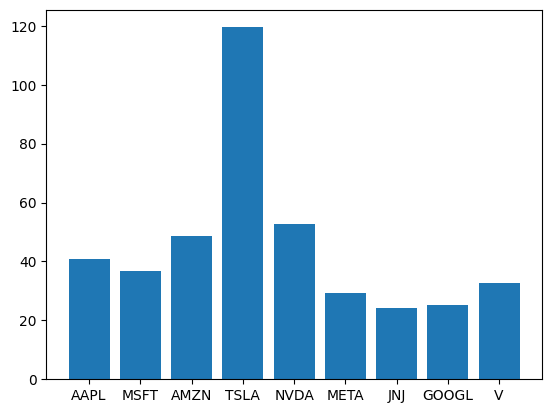

In [50]:
per_bar = []
name = []
pbr_bar = []
eps_bar = []
bps_bar = []

for item in json:
  per_bar.append(item.get('PER'))
  pbr_bar.append(item.get('PBR'))
  eps_bar.append(item.get('eps'))
  bps_bar.append(item.get('bps'))
  name.append(item.get('CODE'))
  if item.get('NAME') == '비자': break
import matplotlib.pyplot as plt
plt.bar(name, per_bar)
plt.show() # per : 주가 수익 비율

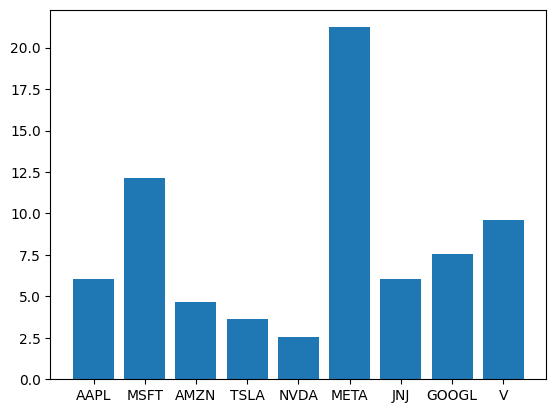

In [51]:
import matplotlib.pyplot as plt
plt.bar(name, eps_bar)
plt.show()#주당순이익

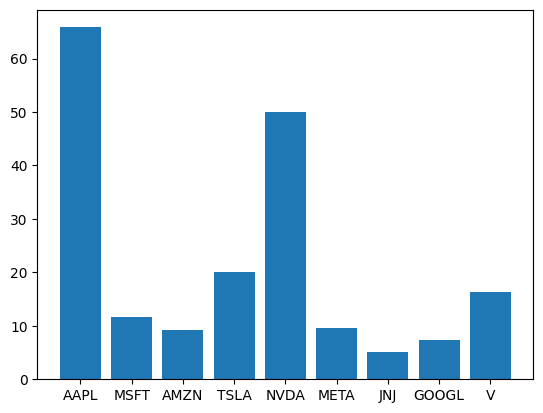

In [52]:
import matplotlib.pyplot as plt
plt.bar(name, pbr_bar)
plt.show()#주가순자산비율

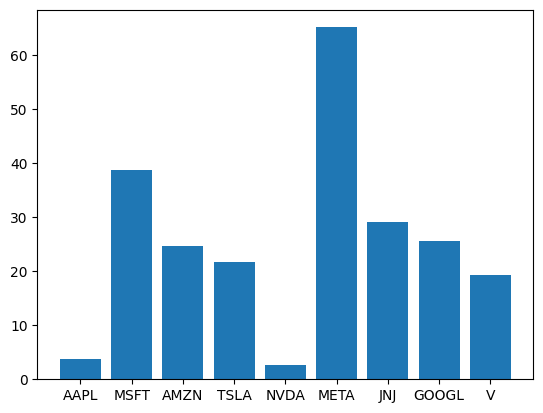

In [54]:
import matplotlib.pyplot as plt
plt.bar(name, bps_bar)
plt.show()# 주당 순 자산